DATS-6103 Data Mining – Final Project
Title: Predicting Kubernetes Pod Overload Using Machine Learning
Authors: Aditi Shukla, Ashley Gyapomah

To run:
- Install: pandas, numpy, matplotlib, seaborn, scikit-learn, xgboost (optional).
- Place `kubernetes_resource_allocation_dataset.csv` in the same folder

In [1]:

#  LOADING & CLEANING DATA


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

#Loading dataset
df = pd.read_csv("kubernetes_resource_allocation_dataset.csv")

# Dataset source:
# Kubernetes resource allocation dataset (link: https://www.kaggle.com/datasets/nickkinyae/kubernetes-resource-and-performancemetricsallocation/data )


print("Original shape:", df.shape)
display(df.head())

#Standardizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("\nCleaned column names:")
print(df.columns.tolist())

#Convert timestamp if exists
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

print("\nINFO AFTER CLEANING:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum())


Original shape: (15000, 15)


,pod_name,namespace,cpu_request,cpu_limit,memory_request,memory_limit,cpu_usage,memory_usage,node_name,pod_status,restart_count,uptime_seconds,deployment_strategy,scaling_policy,network_bandwidth_usage
0,pod_0,dev,1.569542,3.679152,3174.582783,5134.413852,3.345496,2135.310365,node_12,Failed,0,76536,RollingUpdate,Manual,459.015733
1,pod_1,default,0.343119,3.722716,3551.459173,3698.349366,2.758188,7442.200271,node_18,Unknown,2,97849,RollingUpdate,Manual,507.770808
2,pod_2,kube-system,0.249271,1.318147,1578.313253,7418.271122,1.319703,5142.897754,node_7,Failed,2,47370,RollingUpdate,Manual,527.702531
3,pod_3,default,0.311497,2.852595,1392.962372,3628.480705,3.752312,2952.449331,node_20,Failed,6,5685,Recreate,Auto,473.530315
4,pod_4,default,1.532775,0.521618,2660.192655,5091.497752,0.874224,3382.299355,node_38,Unknown,3,4502,Recreate,Auto,973.928080



Cleaned column names:
['pod_name', 'namespace', 'cpu_request', 'cpu_limit', 'memory_request', 'memory_limit', 'cpu_usage', 'memory_usage', 'node_name', 'pod_status', 'restart_count', 'uptime_seconds', 'deployment_strategy', 'scaling_policy', 'network_bandwidth_usage']

INFO AFTER CLEANING:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pod_name                 15000 non-null  object 
 1   namespace                15000 non-null  object 
 2   cpu_request              15000 non-null  float64
 3   cpu_limit                15000 non-null  float64
 4   memory_request           15000 non-null  float64
 5   memory_limit             15000 non-null  float64
 6   cpu_usage                15000 non-null  float64
 7   memory_usage             15000 non-null  float64
 8   node_name                15000 non-null  object 
 9   

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pod_name                 15000 non-null  object 
 1   namespace                15000 non-null  object 
 2   cpu_request              15000 non-null  float64
 3   cpu_limit                15000 non-null  float64
 4   memory_request           15000 non-null  float64
 5   memory_limit             15000 non-null  float64
 6   cpu_usage                15000 non-null  float64
 7   memory_usage             15000 non-null  float64
 8   node_name                15000 non-null  object 
 9   pod_status               15000 non-null  object 
 10  restart_count            15000 non-null  int64  
 11  uptime_seconds           15000 non-null  int64  
 12  deployment_strategy      15000 non-null  object 
 13  scaling_policy           15000 non-null  object 
 14  network_bandwidth_usag

In [3]:
df.describe()

,cpu_request,cpu_limit,memory_request,memory_limit,cpu_usage,memory_usage,restart_count,uptime_seconds,network_bandwidth_usage
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.052096,2.250631,2110.281025,4234.132709,1.994210,4123.388369,4.481733,49973.830800,496.087256
std,0.548135,1.010891,1144.993437,2282.287735,1.155110,2365.471215,2.869857,28825.161296,288.643694
min,0.100021,0.500025,128.119738,256.212641,0.000521,0.012189,0.000000,1.000000,0.006745
25%,0.575561,1.378411,1127.360048,2281.175714,0.989391,2099.208569,2.000000,24955.750000,244.360361
50%,1.055143,2.251391,2097.534763,4212.613405,1.998167,4120.838924,4.000000,49806.000000,493.461715
75%,1.527721,3.125031,3098.478331,6211.191332,2.988054,6189.240921,7.000000,74924.250000,745.483155
max,1.999917,3.999600,4095.689412,8191.858882,3.999931,8191.874733,9.000000,99996.000000,999.936739


In [4]:
df.columns.tolist()

['pod_name',
 'namespace',
 'cpu_request',
 'cpu_limit',
 'memory_request',
 'memory_limit',
 'cpu_usage',
 'memory_usage',
 'node_name',
 'pod_status',
 'restart_count',
 'uptime_seconds',
 'deployment_strategy',
 'scaling_policy',
 'network_bandwidth_usage']

In [5]:
df.mean(numeric_only=True)

cpu_request                    1.052096
cpu_limit                      2.250631
memory_request              2110.281025
memory_limit                4234.132709
cpu_usage                      1.994210
memory_usage                4123.388369
restart_count                  4.481733
uptime_seconds             49973.830800
network_bandwidth_usage      496.087256
dtype: float64

In [6]:
df.var(numeric_only=True)

cpu_request                3.004520e-01
cpu_limit                  1.021901e+00
memory_request             1.311010e+06
memory_limit               5.208837e+06
cpu_usage                  1.334279e+00
memory_usage               5.595454e+06
restart_count              8.236082e+00
uptime_seconds             8.308899e+08
network_bandwidth_usage    8.331518e+04
dtype: float64

In [7]:

# DATA PREPROCESSING


# Creating a working copy to avoid modifying the original
df_clean = df.copy()

# Core numeric columns we rely on
key_cols = [
    "cpu_request", "cpu_limit", "memory_request", "memory_limit",
    "cpu_usage", "memory_usage"
]

# Removing rows where these essential columns have missing values
df_clean = df_clean.dropna(subset=key_cols)

# Removing rows with negative values (invalid readings)
for col in key_cols:
    df_clean = df_clean[df_clean[col] >= 0]

print("Shape after core cleaning:", df_clean.shape)

# displaying cleaned data
display(df_clean[key_cols].head())


Shape after core cleaning: (15000, 15)


,cpu_request,cpu_limit,memory_request,memory_limit,cpu_usage,memory_usage
0,1.569542,3.679152,3174.582783,5134.413852,3.345496,2135.310365
1,0.343119,3.722716,3551.459173,3698.349366,2.758188,7442.200271
2,0.249271,1.318147,1578.313253,7418.271122,1.319703,5142.897754
3,0.311497,2.852595,1392.962372,3628.480705,3.752312,2952.449331
4,1.532775,0.521618,2660.192655,5091.497752,0.874224,3382.299355


In [8]:

#FEATURE ENGINEERING

df_fe = df_clean.copy()  # work on a fresh copy
eps = 1e-6  # small number to avoid division by zero

#Utilization Features
df_fe["cpu_utilization"] = df_fe["cpu_usage"] / (df_fe["cpu_limit"] + eps)
df_fe["memory_utilization"] = df_fe["memory_usage"] / (df_fe["memory_limit"] + eps)

# Usage vs Request Ratios 
df_fe["cpu_request_ratio"] = df_fe["cpu_usage"] / (df_fe["cpu_request"] + eps)
df_fe["memory_request_ratio"] = df_fe["memory_usage"] / (df_fe["memory_request"] + eps)

# Combined Load Metric
df_fe["overall_load"] = (df_fe["cpu_utilization"] + df_fe["memory_utilization"]) / 2

# Displaying engineered columns
print("Engineered feature columns:")
display(df_fe[[
    "cpu_utilization",
    "memory_utilization",
    "cpu_request_ratio",
    "memory_request_ratio",
    "overall_load"
]].head())


Engineered feature columns:


,cpu_utilization,memory_utilization,cpu_request_ratio,memory_request_ratio,overall_load
0,0.909311,0.415882,2.131510,0.672627,0.662597
1,0.740907,2.012303,8.038545,2.095533,1.376605
2,1.001180,0.693274,5.294233,3.258477,0.847227
3,1.315403,0.813687,12.046042,2.119547,1.064545
4,1.675984,0.664303,0.570353,1.271449,1.170143


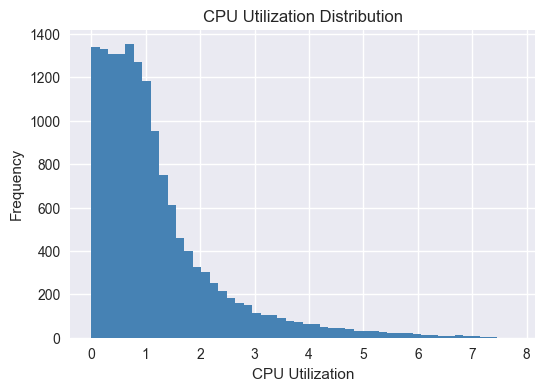

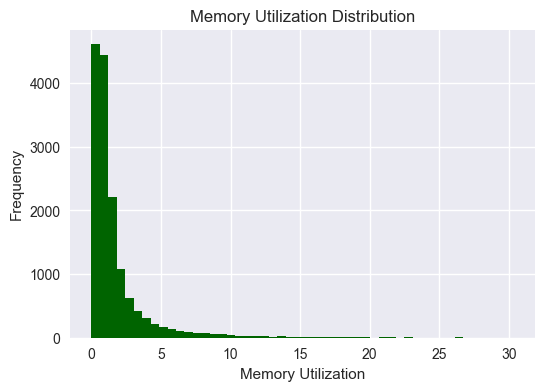

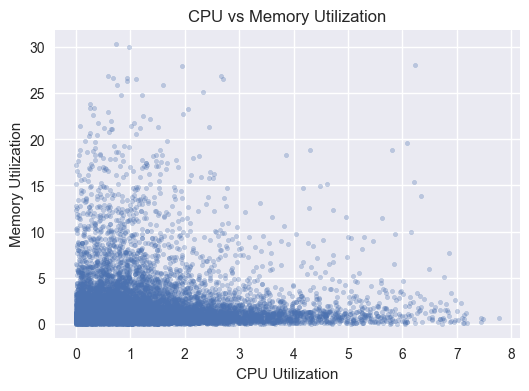

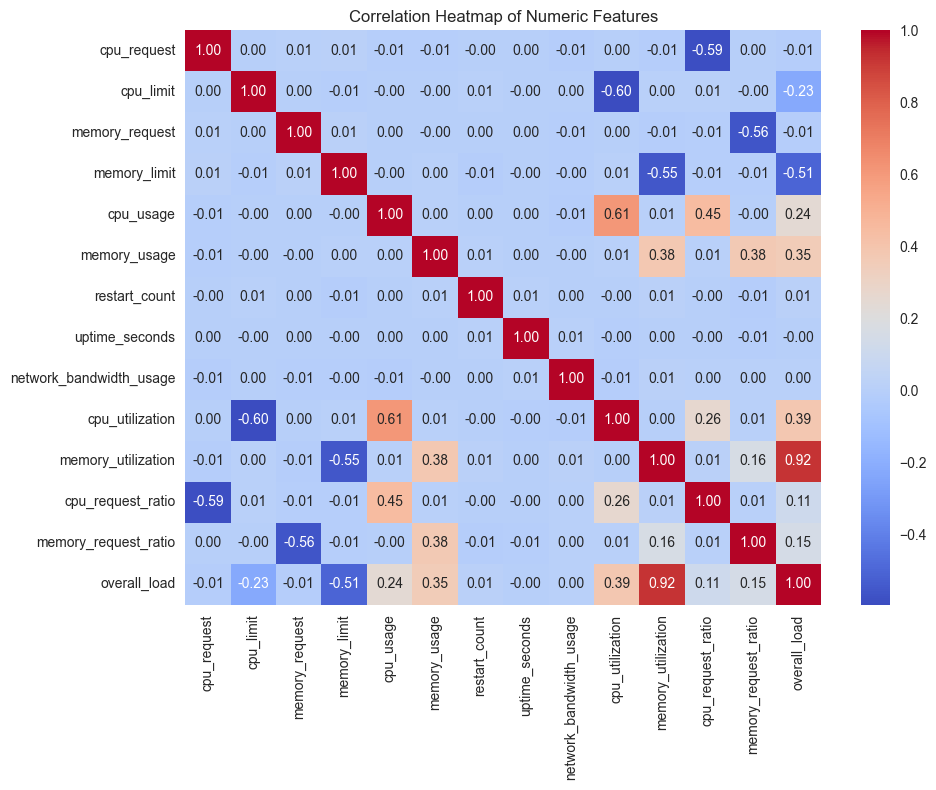

In [9]:

# EXPLORATORY DATA ANALYSIS (EDA)


plt.style.use("seaborn-v0_8")

# 1. Distribution of CPU Utilization
plt.figure(figsize=(6,4))
df_fe["cpu_utilization"].hist(bins=50, color="steelblue")
plt.title("CPU Utilization Distribution")
plt.xlabel("CPU Utilization")
plt.ylabel("Frequency")
plt.show()

# 2. Distribution of Memory Utilization
plt.figure(figsize=(6,4))
df_fe["memory_utilization"].hist(bins=50, color="darkgreen")
plt.title("Memory Utilization Distribution")
plt.xlabel("Memory Utilization")
plt.ylabel("Frequency")
plt.show()

# 3. Joint relationship: CPU vs Memory Utilization 
plt.figure(figsize=(6,4))
plt.scatter(df_fe["cpu_utilization"], df_fe["memory_utilization"], alpha=0.3, s=10)
plt.title("CPU vs Memory Utilization")
plt.xlabel("CPU Utilization")
plt.ylabel("Memory Utilization")
plt.show()

# 4. Correlation Heatmap of Numeric Features
numeric_cols = df_fe.select_dtypes(include=[np.number]).columns
corr = df_fe[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


In [10]:

# PART 5 — STATISTICAL TESTING

from scipy.stats import ttest_ind, f_oneway, chi2_contingency

#  T-TEST 
# Comparing CPU usage for overloaded vs non-overloaded (after we create the target later)
# For now, let's define a temporary overload threshold
cpu_thresh = 0.75
df_fe["overloaded_temp"] = (df_fe["cpu_utilization"] > cpu_thresh).astype(int)

group1 = df_fe[df_fe["overloaded_temp"] == 1]["cpu_usage"]
group0 = df_fe[df_fe["overloaded_temp"] == 0]["cpu_usage"]

t_stat, p_val = ttest_ind(group1, group0, equal_var=False)

print("\n T-TEST: CPU Usage vs Overload ")
print("T-statistic:", round(t_stat, 4))
print("P-value:", p_val)
print("Interpretation:",
      "Significant difference" if p_val < 0.05 else "No significant difference")


# ANOVA 
print("\nANOVA: CPU Usage Across Namespaces")
groups = [group["cpu_usage"].values for _, group in df_fe.groupby("namespace")]
anova_stat, anova_p = f_oneway(*groups)

print("ANOVA F-statistic:", round(anova_stat, 4))
print("P-value:", anova_p)
print("Interpretation:",
      "Groups differ significantly" if anova_p < 0.05 else "No significant difference")


#CHI-SQUARE 
print("\n CHI-SQUARE: Scaling Policy vs Overload")
contingency = pd.crosstab(df_fe["scaling_policy"], df_fe["overloaded_temp"])
chi2, p, _, _ = chi2_contingency(contingency)

print("Chi-square:", round(chi2, 4))
print("P-value:", p)
print("Interpretation:",
      "Variables are dependent" if p < 0.05 else "Variables are independent")



 T-TEST: CPU Usage vs Overload 
T-statistic: 134.6196
P-value: 0.0
Interpretation: Significant difference

ANOVA: CPU Usage Across Namespaces
ANOVA F-statistic: 0.7011
P-value: 0.5512752358978207
Interpretation: No significant difference

 CHI-SQUARE: Scaling Policy vs Overload
Chi-square: 0.6446
P-value: 0.4220412049453919
Interpretation: Variables are independent


In [11]:

# PART 6 — DEFINE TARGET VARIABLE


df_model = df_fe.copy()

# Overload thresholds
cpu_thresh = 0.75
mem_thresh = 0.75

# Logical overload condition
df_model["overloaded_now"] = (
    (df_model["cpu_utilization"] > cpu_thresh) |
    (df_model["memory_utilization"] > mem_thresh)
).astype(int)

# Final target
df_model["need_new_pod"] = df_model["overloaded_now"]

print("Target distribution (need_new_pod):")
print(df_model["need_new_pod"].value_counts())
print("Overload rate:", round(df_model["need_new_pod"].mean(), 4))

# Displaying the final dataset with target
display(df_model[[
    "cpu_utilization", "memory_utilization",
    "overall_load", "need_new_pod"
]].head())


Target distribution (need_new_pod):
need_new_pod
1    12552
0     2448
Name: count, dtype: int64
Overload rate: 0.8368


,cpu_utilization,memory_utilization,overall_load,need_new_pod
0,0.909311,0.415882,0.662597,1
1,0.740907,2.012303,1.376605,1
2,1.001180,0.693274,0.847227,1
3,1.315403,0.813687,1.064545,1
4,1.675984,0.664303,1.170143,1


In [12]:

#  TRAIN-TEST SPLIT + FEATURE SELECTION


df_ml = df_model.copy()

#Feature Matrix & Target
X = df_ml.drop(columns=["need_new_pod"])  # all columns except target
y = df_ml["need_new_pod"]

# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps class balance consistent
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

#Identify Feature Types
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)


Training set shape: (12000, 22)
Test set shape: (3000, 22)

Numeric features: ['cpu_request', 'cpu_limit', 'memory_request', 'memory_limit', 'cpu_usage', 'memory_usage', 'restart_count', 'uptime_seconds', 'network_bandwidth_usage', 'cpu_utilization', 'memory_utilization', 'cpu_request_ratio', 'memory_request_ratio', 'overall_load', 'overloaded_temp', 'overloaded_now']
Categorical features: ['pod_name', 'namespace', 'node_name', 'pod_status', 'deployment_strategy', 'scaling_policy']


In [13]:

# PREPROCESSING PIPELINE

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numeric transformer
numeric_transformer = StandardScaler()

# Categorical transformer
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combined preprocessing pipeline 
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

print("Preprocessing pipeline created successfully.")


Preprocessing pipeline created successfully.


In [14]:

#  MODEL TRAINING


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report
)

# Optional: XGBoost
try:
    from xgboost import XGBClassifier
    XGB_AVAILABLE = True
except:
    XGB_AVAILABLE = False
    print("XGBoost not installed — skipping.")


#Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42, class_weight="balanced"
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

if XGB_AVAILABLE:
    models["XGBoost"] = XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric="logloss"
    )


# Train and Evaluate Each Model
results = []

for name, clf in models.items():
    print(f"\nTraining {name} ")

    # Building full pipeline
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", clf)
    ])
    
    # Train
    pipe.fit(X_train, y_train)
    
    # Predict
    y_pred = pipe.predict(X_test)
    
    # Probabilities for ROC-AUC
    if hasattr(pipe.named_steps["model"], "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    else:
        y_proba = None
        roc = float("nan")
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print("Accuracy :", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall   :", round(rec, 4))
    print("F1-score :", round(f1, 4))
    print("ROC-AUC  :", round(roc, 4))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Store results
    results.append({
        "model": name,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc
    })


# Comparison Table
import pandas as pd
results_df = pd.DataFrame(results)
print("\n Model Performance Comparison")
display(results_df.sort_values(by="f1", ascending=False))


XGBoost not installed — skipping.

Training Logistic Regression 
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0
ROC-AUC  : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00      2510

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Training Decision Tree 
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0
ROC-AUC  : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00      2510

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Training Random Forest 
Accuracy : 1.0
Precision: 1.0
Rec

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0
1,Decision Tree,1.0,1.0,1.0,1.0,1.0
2,Random Forest,1.0,1.0,1.0,1.0,1.0
3,Gradient Boosting,1.0,1.0,1.0,1.0,1.0


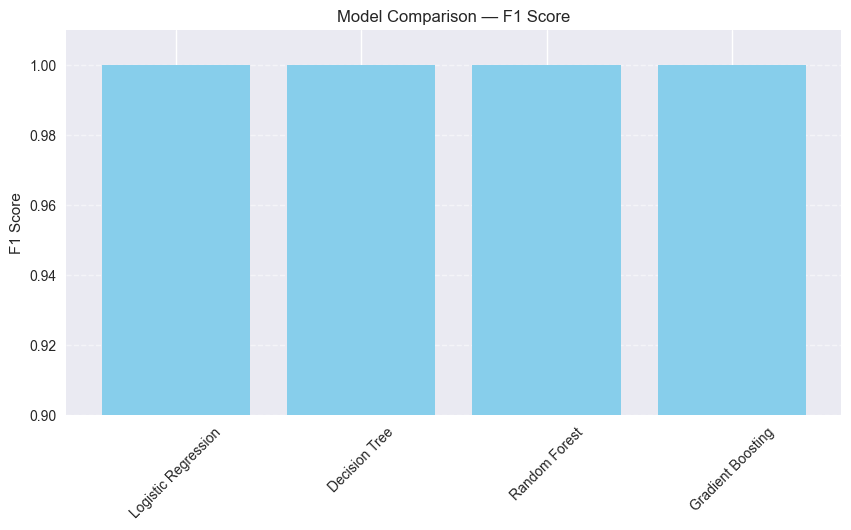

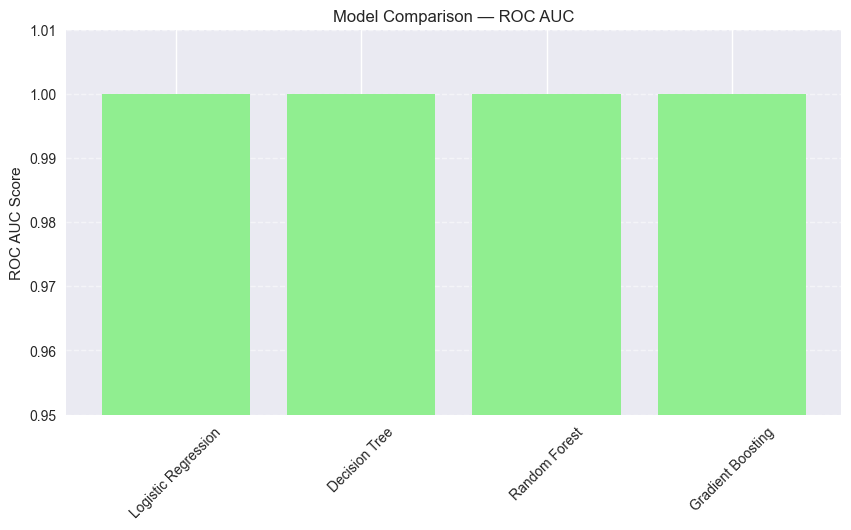

In [15]:

# VISUAL MODEL COMPARISON


plt.figure(figsize=(10,5))

plt.bar(results_df["model"], results_df["f1"], color="skyblue")
plt.title("Model Comparison — F1 Score")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0.9, 1.01)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


plt.figure(figsize=(10,5))
plt.bar(results_df["model"], results_df["roc_auc"], color="lightgreen")
plt.title("Model Comparison — ROC AUC")
plt.ylabel("ROC AUC Score")
plt.xticks(rotation=45)
plt.ylim(0.95, 1.01)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
